Primero importamos las librerías que vamos a necesitar

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ahora introducimos la ruta en la que guardamos el archivo con los datos que se analizarán

In [70]:
df = pd.read_csv('/home/luis-loreto/Documentos/Python/Titanic/Tablas/train.csv')

Generamos una previsualización de la información contenida en el .csv

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Iniciamos con el análisis exploratorio. Vemos cuántos registros tiene cada variable. Se puede observar que son 11 variables independientes y una dependiente: Survived. Ésta última será la variable para el aprendizaje en nuestro modelos de machine learning. 

In [6]:
df.count().reset_index(name="Total")

,index,Total
0,PassengerId,891
1,Survived,891
2,Pclass,891
3,Name,891
4,Sex,891
5,Age,714
6,SibSp,891
7,Parch,891
8,Ticket,891
9,Fare,891


In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Podemos observar que son 891 observaciones en nuestro conjunto de entrenamiento, no obstante, se trata de una base desbalanceada, pues las variables "Age", "cabin" y "Embarked" presentan missings, es decir, registros sin informaición. Si queremos trabajar con alguna de estas tres variables debemos buscar un metodo para reemplazar los registros faltantes, a esto se le conoce como imputación.

Continuando con el análisis exploratorio, podemos empezar a observar cuántos sobrevivientes hubo agrupando por clase.

In [17]:
Pclass = df.groupby(["Survived", "Pclass"])["Survived"].count().reset_index(name="Cantidad")

In [8]:
Pclass

,Survived,Pclass,Cantidad
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


Ahora bien, podemos hacer una lift table, algo muy común en el análisis de riesgos como una primera métrica descriptiva de cómo se ajusta la variable a nuestra "marca de malo", en este caso Survived

In [13]:
# Pivotear el DataFrame
tabla1 = Pclass.pivot_table(index='Pclass', columns='Survived', values='Cantidad', aggfunc='sum', fill_value=0)
tabla1['Total'] = (tabla1[0] + tabla1[1])
tabla1["% de sobrevivientes"] = (tabla1[1] / tabla1['Total'])
tabla1

Survived,0,1,Total,% de sobrevivientes
Pclass,,,,
1,80,136,216,0.629630
2,97,87,184,0.472826
3,372,119,491,0.242363


Se puede observar que la proporción de sobrevivientes aumenta a medida que la variable Pclase también lo hace. Digamos que esta es una primera aproximación, es una buena manera descriptiva de ver la relación entre una variable binaria y una ordinal categórica. No obstante, son 10 las variables que debemos analizar para saber cuáles de ellas se pueden usar para generar un modelo que prediga la supervivencia

Iniciemos con la exploración de cada variable. A pesar de que la intución nos pueda sugerir que variables como "Name" no deberían ser relevantes para explicar Survived, asumamos que no tenemos nada de teoría, es decir, es un trabajo totalmente empírico y exploratorio. En ciencias sociales, la teoría sirve para tener una dirección y no andar a ciegas en un mar de datos, careciendo de cualquier indicio de casualidad o de explicación. La teoría puede ser algo fantástico (en el buen sentido), pero en nuestro ejercicio prescindiremos totalmente de ella.

In [ ]:
df.groupby('PassengerId').count()

Vamos a contar el número de observaciones según Pclass

In [19]:
df.groupby(["Pclass"])["Pclass"].count().reset_index(name="Cantidad")

,Pclass,Cantidad
0,1,216
1,2,184
2,3,491


In [20]:
#PassengerId
df.groupby(["Sex"])["Sex"].count().reset_index(name="Cantidad")

,Sex,Cantidad
0,female,314
1,male,577


La variable ticket, a primera vista no nos brinda información relevante, pero si observamos más detenidamente, se podrían encontrar varios patrones. Se podrían clasificar de la siguiente manera:
Tickets sin letra
Tickets que inician con alguna letra

Lo más probable es que estos registros tengan errores y se hayan llevado a cabo. Esta variable requiere un trabajo de limpieza y depuración. 
Primero que nada, observamos uqe hay tickets que de 4, 5 o 6 dígitos. No obstante, todos parecen tener continuidad en lo que respecta a los dos primeros dígitos. Por lo tanto, los tíckets sin letra se covertiran en tickets que consistan en los dos primeros dígitos.
Luego están los que inician con letra. Al parecer, los que inician con A, pueden ir seguidos de un 5 o un 4, por lo que estos tickets serán renombrados como A5 o A4 según corresponda. Luego están los que inician con C, CA, FC, 

In [108]:
df.groupby(["Ticket"])["Ticket"].count().reset_index(name="Cantidad")

,Ticket,Cantidad
0,110152,3
1,110413,3
2,110465,2
3,110564,1
4,110813,1
5,111240,1
6,111320,1
7,111361,2
8,111369,1
9,111426,1


In [89]:
df['Ticket2'] = df['Ticket'].str[:4]

In [100]:
df['Ticket2'] = df['Ticket2'].apply(lambda x: 'A5' if x.startswith('A/5')
      else ('A5' if x.startswith('A.5')  
      else ('A4' if x.startswith('A/4') 
      else ('W' if x.startswith('W.')                         
      else ('CA' if x.startswith('C')  
      else ('PC' if x.startswith('PC') 
            else x[:2])
)))))

In [ ]:
df

In [102]:
df.groupby(["Ticket2"])["Ticket2"].count().reset_index(name="Cantidad")

,Ticket2,Cantidad
0,11,88
1,12,4
2,13,11
3,14,4
4,16,10
5,17,13
6,19,16
7,20,1
8,21,4
9,22,9


In [105]:
Ticket = df.groupby(["Survived", "Ticket2"])["Survived"].count().reset_index(name="Cantidad")

In [107]:
tabla1 = Ticket.pivot_table(index='Ticket2', columns='Survived', values='Cantidad', aggfunc='sum', fill_value=0)
tabla1['Total'] = (tabla1[0] + tabla1[1])
tabla1["% de sobrevivientes"] = (tabla1[1] / tabla1['Total'].sum())
tabla1

Survived,0,1,Total,% de sobrevivientes
Ticket2,,,,
11,38,50,88,0.056117
12,2,2,4,0.002245
13,3,8,11,0.008979
14,1,3,4,0.003367
16,2,8,10,0.008979
17,3,10,13,0.011223
19,5,11,16,0.012346
20,0,1,1,0.001122
21,4,0,4,0.000000


In [67]:
df["Ticket2"]

0      A/5 
1      PC 1
2      STON
3      1138
4      3734
5      3308
6      1746
7      3499
8      3477
9      2377
10     PP 9
11     1137
12     A/5.
13     3470
14     3504
15     2487
16     3826
17     2443
18     3457
19     2649
20     2398
21     2486
22     3309
23     1137
24     3499
25     3470
26     2631
27     1995
28     3309
29     3492
30     PC 1
31     PC 1
32     3356
33     C.A.
34     PC 1
35     1137
36     2677
37     A./5
38     3457
39     2651
40     7546
41     1166
42     3492
43     SC/P
44     3309
45     S.C.
46     3703
47     1431
48     2662
49     3492
50     3101
51     A/4.
52     PC 1
53     2926
54     1135
55     1994
56     C.A.
57     2697
58     C.A.
59     CA 2
60     2669
61     1135
62     3697
63     3470
64     PC 1
65     2661
66     C.A.
67     S.P.
68     3101
69     3151
70     C.A.
71     CA 2
72     S.O.
73     2680
74     1601
75     3481
76     3492
77     3747
78     2487
79     3645
80     3457
81     3457
82     3309
83  

In [21]:
df.groupby(["SibSp"])["SibSp"].count().reset_index(name="Cantidad")

,SibSp,Cantidad
0,0,608
1,1,209
2,2,28
3,3,16
4,4,18
5,5,5
6,8,7


In [22]:
df.groupby(["Parch"])["Parch"].count().reset_index(name="Cantidad")

,Parch,Cantidad
0,0,678
1,1,118
2,2,80
3,3,5
4,4,4
5,5,5
6,6,1


In [ ]:
df.groupby(["Age"])["Age"].count().reset_index(name="Cantidad")

In [103]:
Pclass = df.groupby(["Survived", "Pclass"])["Survived"].count().reset_index(name="Cantidad")

In [58]:
clase = df[["Pclass", "Survived"]]

<AxesSubplot: >

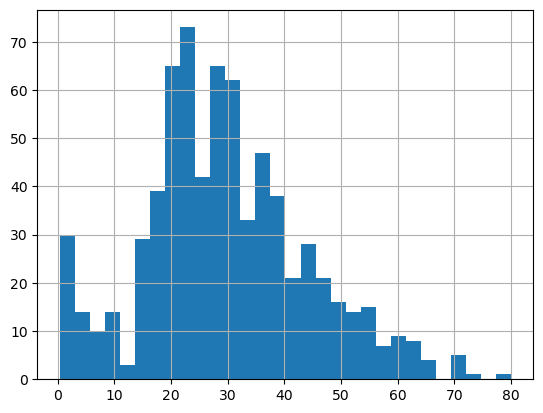

In [61]:
df["Age"].hist(bins = 30)

<AxesSubplot: >

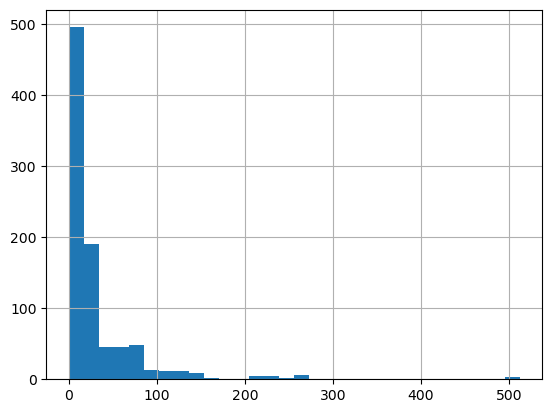

In [62]:
df["Fare"].hist(bins = 30)